In [1]:
from starccato_flow.plotting.plotting import plot_corner
from starccato_flow.plotting.plotting_defaults import GENERATED_SIGNAL_COLOUR
from starccato_flow.training.trainer import Trainer, CCSNSNRData

/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


MPS device found


/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:61: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (


Generated 5150 samples
β_IC^b range: [0.0000, 0.2500]
log(A) range: [0.0000, 9.2103]
ye range: [0.0000, 0.3000]
ω_0 range: [0.0000, 16.0000]


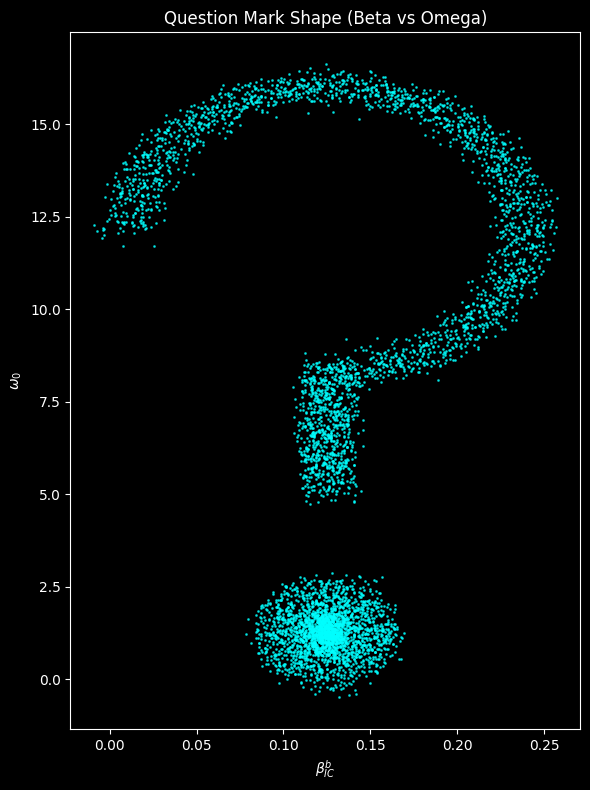

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import math

# Parameter ranges from plot_corner
beta_range = (0, 0.25)
log_a_range = (0, math.log(10000))
ye_range = (0, 0.3)
omega_range = (0, 16)

# Create a proper question mark shape - right side up!
# Top curved hook - starts high, curves around
t_top = np.linspace(-np.pi/2, np.pi, 400)
x_top = 0.3 * np.cos(t_top) + 0.3
y_top = 0.3 * np.sin(t_top) + 0.7

# Straight vertical line going down from bottom of curve
y_line = np.linspace(0.4, 0.15, 150)
x_line = np.full_like(y_line, 0.3)

# Bottom dot (separate from the line) - SMALLER
# Move it lower to create a clear gap
theta_dot = np.linspace(0, 2*np.pi, 300)  # More points for visibility
x_dot = 0.10 * np.cos(theta_dot) + 0.3  # Smaller radius (was 0.15, now 0.10)
y_dot = 0.10 * np.sin(theta_dot) - 0.15  # Lower position

# Add some thickness by creating parallel lines with slight offsets
offsets = np.linspace(-0.03, 0.03, 5)
x_qm_list = []
y_qm_list = []

for offset in offsets:
    x_qm_list.extend(x_top + offset)
    y_qm_list.extend(y_top)
    x_qm_list.extend(x_line + offset)
    y_qm_list.extend(y_line)

# Add the dot with multiple layers for more density
dot_offsets = np.linspace(0, 0.10, 8)  # Multiple concentric circles (smaller radius)
for r in dot_offsets:
    x_qm_list.extend(r * np.cos(theta_dot) + 0.3)
    y_qm_list.extend(r * np.sin(theta_dot) - 0.15)  # Lower position

x_qm = np.array(x_qm_list)
y_qm = np.array(y_qm_list)

# Normalize to [0, 1] range
x_norm = (x_qm - x_qm.min()) / (x_qm.max() - x_qm.min())
y_norm = (y_qm - y_qm.min()) / (y_qm.max() - y_qm.min())

# Create independent question mark patterns for each parameter
# Each gets the same base pattern but with small independent noise
noise_scale = 0.015

# All parameters use the question mark shape directly (no mixing/rotation)
beta_ic = beta_range[0] + (x_norm + np.random.normal(0, noise_scale, len(x_norm))) * (beta_range[1] - beta_range[0])
log_a = log_a_range[0] + (y_norm + np.random.normal(0, noise_scale, len(x_norm))) * (log_a_range[1] - log_a_range[0])
ye = ye_range[0] + (x_norm + np.random.normal(0, noise_scale, len(x_norm))) * (ye_range[1] - ye_range[0])
omega = omega_range[0] + (y_norm + np.random.normal(0, noise_scale, len(x_norm))) * (omega_range[1] - omega_range[0])

# Combine into samples array in the correct order: [beta, log_a, ye, omega]
samples = np.column_stack([beta_ic, log_a, ye, omega])

# Clip to valid ranges
samples[:, 0] = np.clip(samples[:, 0], beta_range[0], beta_range[1])
samples[:, 1] = np.clip(samples[:, 1], log_a_range[0], log_a_range[1])
samples[:, 2] = np.clip(samples[:, 2], ye_range[0], ye_range[1])
samples[:, 3] = np.clip(samples[:, 3], omega_range[0], omega_range[1])

print(f"Generated {len(samples)} samples")
print(f"β_IC^b range: [{samples[:, 0].min():.4f}, {samples[:, 0].max():.4f}]")
print(f"log(A) range: [{samples[:, 1].min():.4f}, {samples[:, 1].max():.4f}]")
print(f"ye range: [{samples[:, 2].min():.4f}, {samples[:, 2].max():.4f}]")
print(f"ω_0 range: [{samples[:, 3].min():.4f}, {samples[:, 3].max():.4f}]")

# Visualize the question mark shape in 2D (beta vs omega)
plt.figure(figsize=(6, 8), facecolor='black')
plt.scatter(beta_ic, omega, s=1, alpha=0.7, c='cyan')
plt.xlabel(r"$\beta_{IC}^b$", color='white')
plt.ylabel(r"$\omega_0$", color='white')
plt.title("Question Mark Shape (Beta vs Omega)", color='white')
plt.gca().set_facecolor('black')
plt.gca().tick_params(colors='white')
for spine in plt.gca().spines.values():
    spine.set_edgecolor('white')
plt.tight_layout()
plt.show()

Saved plot to: plots/question_mark_corner_plot.png


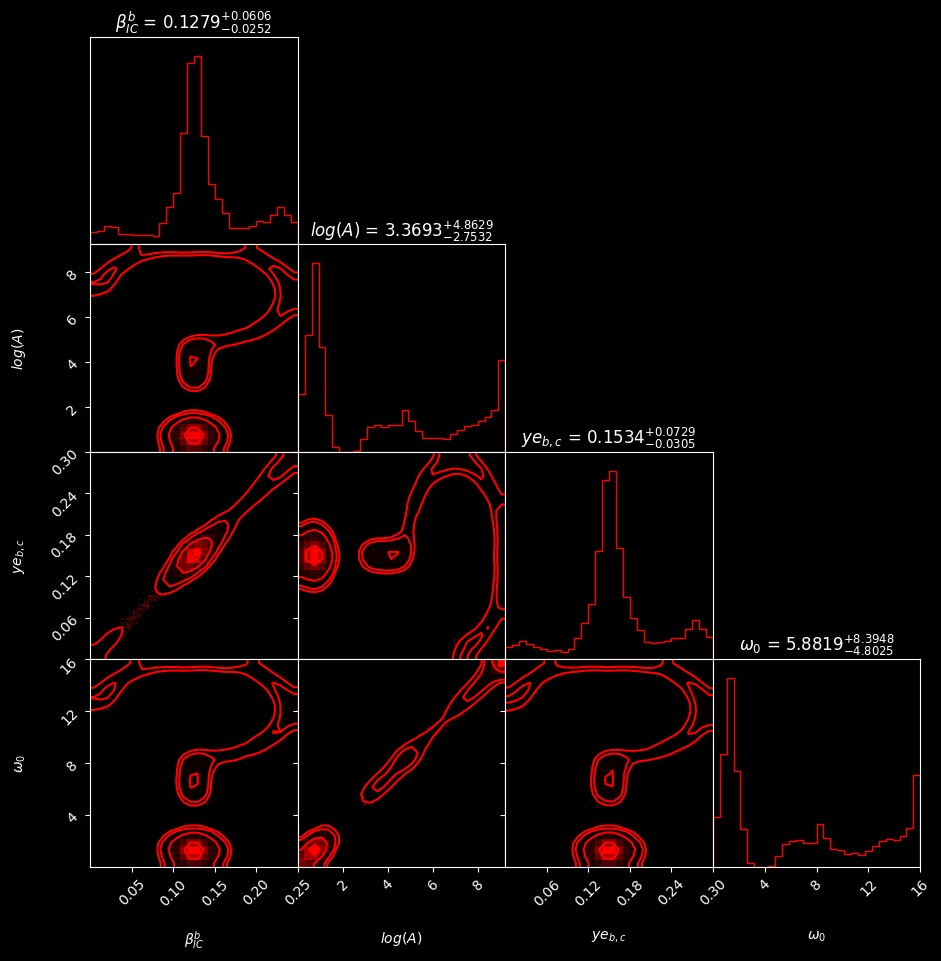

In [3]:
# Plot the question mark distribution
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['savefig.facecolor'] = 'none'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

figure = corner.corner(
    samples,
    labels=[
        r"$\beta_{IC}^b$",
        r"$log(A)$",
        r"$ye_{b,c}$",
        r"$\omega_0$"
    ],
    # range=[(0, 0.25), (0, math.log(10000)), (0, 0.3), (0, 16)],
    show_titles=True,
    title_quantiles=[0.16, 0.5, 0.84],  # ← ADD THIS LINE
    title_fmt='.4f',
    bins=30,
    smooth=1,
    color=GENERATED_SIGNAL_COLOUR,
    hist_kwargs={'density': True, 'alpha': 1.0},
    plot_datapoints=True,
    data_kwargs={'alpha': 0.3, 'ms': 1}
)

# Style the plot
for ax in figure.get_axes():
    for patch in ax.patches:
        patch.set_facecolor("white")
        patch.set_alpha(1.0)

for ax in figure.get_axes():
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

figure.patch.set_alpha(1.0)
figure.subplots_adjust(hspace=0.0, wspace=0.0)

# Save the plot
plt.savefig('plots/question_mark_corner_plot.png', dpi=300, bbox_inches='tight', transparent=True)
print("Saved plot to: plots/question_mark_corner_plot.png")

plt.show()

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:387: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:387: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:387: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


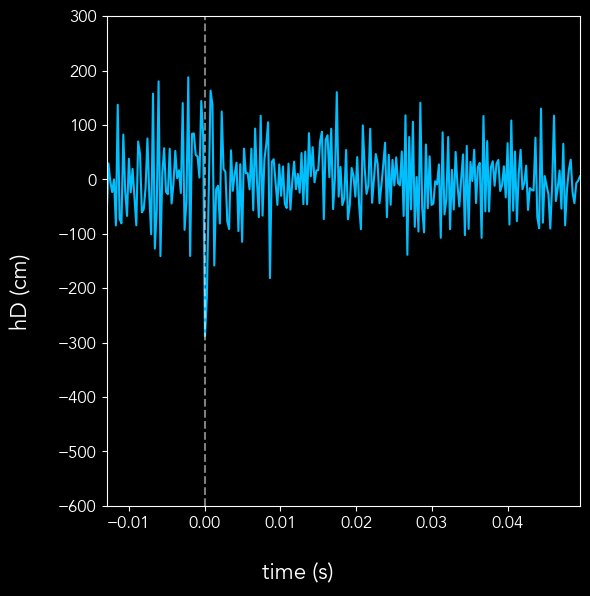

In [23]:
ccsn_dataset = CCSNSNRData(noise=True, curriculum=True)
ccsn_dataset.set_snr(10)
ccsn_dataset.plot_signal_grid(n_signals=1, background='black', font_family="sans-serif", font_name="Avenir", fname="plots/candidate_signal.png")